## Lab 11.2

### Activity 1
Complete this activity before the end of the lab by entering the answer into the Brightspace quiz. Add, commit and push this notebook to your repository.
 


Name: `time-T9-five` `temp-3`

Complete  activity 1 before the end of the lab by entering the answer into the CourseSpaces quiz.

A trajectory is a time evolution of temperature. In this case it describes typical timescales and temperatures for H-burning nucleosynthesis in stars. 

1. Read file `T-evol.dat` using numpy's `loadtxt` method (see nb `2.2_Python_II.ipynb`) and combine all data read from the file into one dictionary `traj_data`, so that you can access it like this: `traj_data['T9']` and likewise for key `'time'`. 
2. Plot temperature as a function of time. Use log scale when appropriate. 
3. Calculate the product of the fifth values of time and temperature contained in the file `T-evol.dat` using the dictionary `traj_data`. Enter the product into the quiz `time-T9-five`, **rounded to two decimals!**
4. Create a linear interpolation object using `interpolate.interp1d` called `temp_int`. Enter the result of `temp_int(2.0e4)` rounded to two decimals into quiz `temp-3`.

In [ ]:
%pylab ipympl

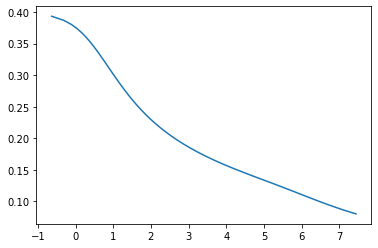

Product of the fifth val: 0.40893817284161543


array(0.14997382)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

t, T = np.loadtxt("../Assignments/T-evol.dat", unpack=True)
traj_data = {"T9": T[1:], "t": t[1:]}

plt.plot(np.log10(traj_data["t"]), traj_data["T9"])
plt.show()
print(f"Product of the fifth val: {traj_data['t'][3]*traj_data['T9'][3]}")

temp_int = interp1d(t, T, kind='linear')
temp_int(2.0*10**4)

### Activity 2
Name: `rate-0.2`, `4rates-sum`

Finish by Thursday 9:30am. 

In the `Data` dir you find these files: `files = ['c12pg.txt','c13pg.txt','n14pg.txt','n15pa.txt']`. They each contain a table with two columns, the temperature in units of $10^9K$ called `T9` and a reaction rate. 

1. Create a data dictionary called `nucdata` that has as first key the file name, and then for each file data set the two key `T9` and `rate`. It contains all reaction rate data and can be accessed like this: `nucdata['n15pa.txt']['rate'][where(nucdata['n15pa.txt']['T9']==0.2)[0][0]]` which would return the rate from the `n15pa.txt` file for `T9 = 0.02`. Round to two decimals and enter into `rate-0.2` 
2. Create in a loop over `files` a 1D interpolation function and store these in a list called `fints`. Make a plot of the four interpolation functions for the temperature array `TT=linspace(0.1,0.3,100)`. Each line must have different color, shape and glyph. Use `markevery` to ensure that there are not too many glyphs.  
3. Write a function `get_rates` that takes this list as an optional argument, as well as a temperature as `T9` and return the interpolated rates from all for files. Calculate the sum of the four rates as returned from `get_rates` for `T9=0.189`, and enter into `4rates-sum` rounded to two decimals. 

In [1]:
# Hint: consider using a dictionary to build your reaction rate data object.


rate-0.2: 96.63554
rate-sum: 54.623098850354545


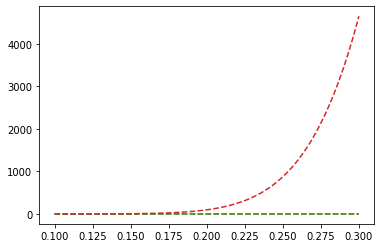

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

files = ['c12pg.txt','c13pg.txt','n14pg.txt','n15pa.txt']
nucdata = {}

for item in files:
    T, rate = np.loadtxt("../Data/"+item, unpack = True)
    nucdata[item] = {"T9": T, "rate": rate}

rate1 = nucdata['n15pa.txt']['rate'][np.where(nucdata['n15pa.txt']['T9']==0.2)[0][0]]
print(f'rate-0.2: {rate1}')
    
TT = np.linspace(0.1, 0.3, 100)
fints = []
for i in files:
    fints.append(interp1d(nucdata[i]['T9'], np.log10(nucdata[i]['rate']), kind='cubic'))
    
def get_rates(T, fints):
    res = []
    for i, temp in enumerate(fints):
        res.append(fints[i](T))
    return np.array(res)

print(f'rate-sum: {sum(10**get_rates(0.189, fints))}')

for i in range(4):
    plt.plot(TT, 10**fints[i](TT), '--')
    
plt.show()